In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from random import randint

In [121]:
input_image = cv2.imread("Assignment_MV_01_image_1.jpg")    
#cv2.imshow("input", input_image)    

img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)    
# cv2.imshow("gray", img)

img = img.astype('float')

height, width = img.shape[:2]
print(img.shape)

img_resized = cv2.resize(img, (2*width, 2*height))
print(img_resized.shape)
# cv2.imshow("gray", img_resized/255)


cv2.waitKey(0)    
cv2.destroyAllWindows()

(768, 1024)
(1536, 2048)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


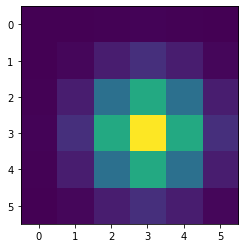

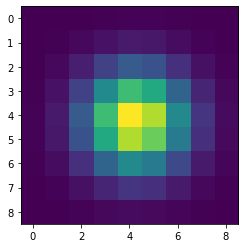

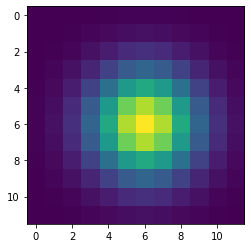

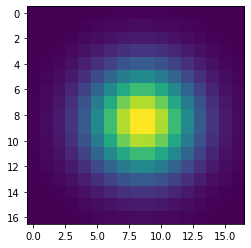

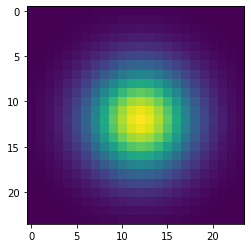

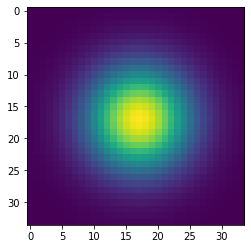

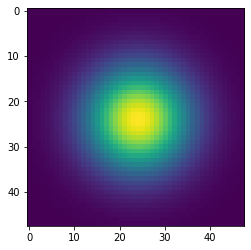

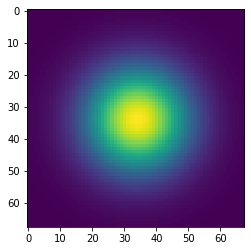

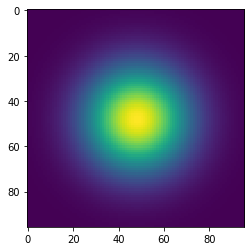

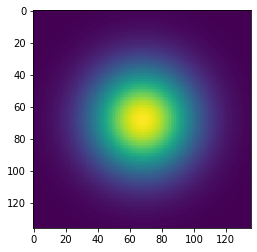

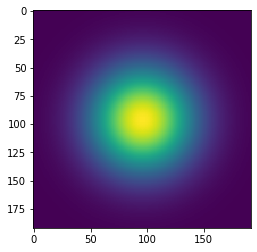

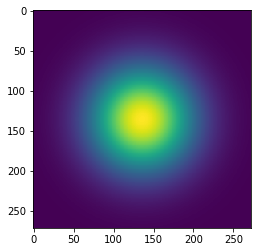

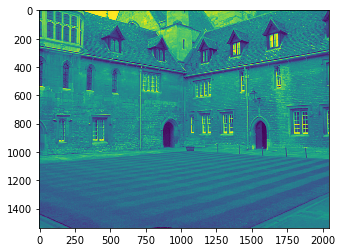

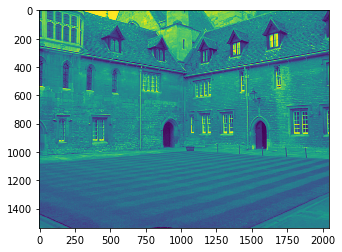

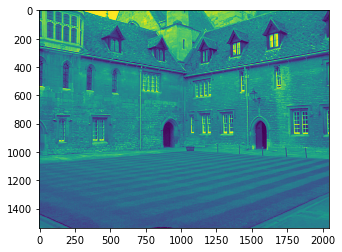

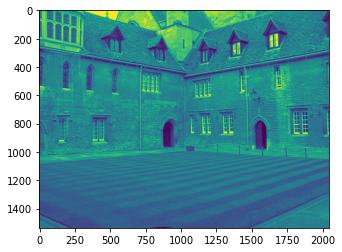

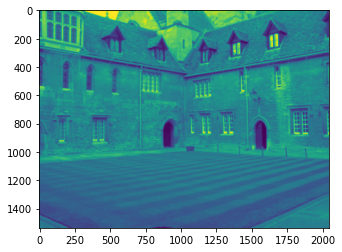

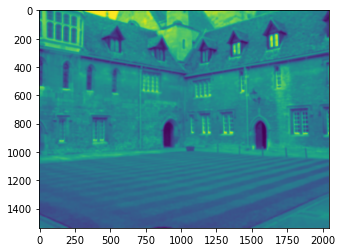

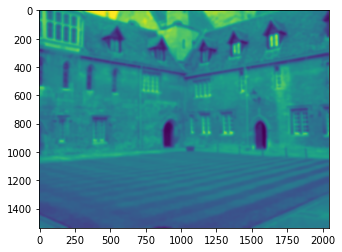

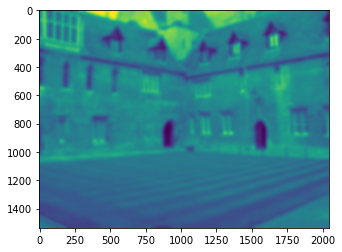

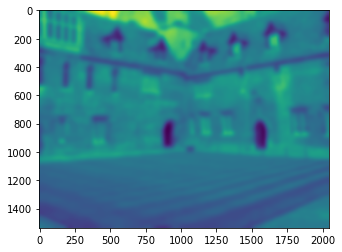

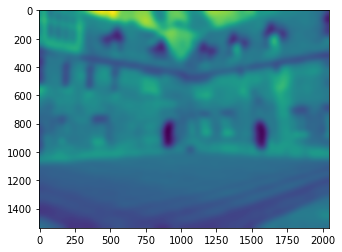

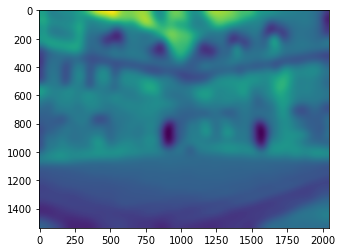

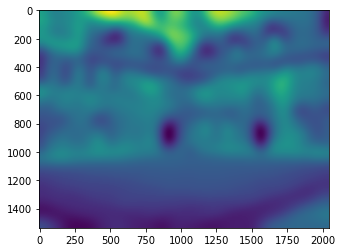

In [122]:
gaussian_img = []
for k in range(12):
    sigma = 2**(k/2)
    x,y = np.meshgrid(np.arange(-3*sigma, 3*sigma), np.arange(-3*sigma, 3*sigma))
    gaussian_kernel = 1/(2 * np.pi * (sigma**2)) * np.exp(-(x**2 + y**2) / (2 * (sigma**2)))
   
    plt.figure()
    plt.imshow(gaussian_kernel);
    kernel_img = cv2.filter2D(img_resized, -1, gaussian_kernel)
#     cv2.imshow('gaussian_'+str(i+1), kernel_img/np.max(img_resized))
    gaussian_img.append(kernel_img)
    cv2.waitKey(0)   
    

for k, img in enumerate(gaussian_img):
    plt.figure()
    plt.imshow(img);
#     win_name = "Image - Guassian Smoothing " + str(k)
#     cv2.namedWindow(win_name)
#     cv2.startWindowThread()
#     cv2.imshow(win_name, img / np.max(img))
#     cv2.waitKey(0)


# sigma = 1
# x,y = np.meshgrid(np.arange(-3*sigma, 3*sigma), np.arange(-3*sigma, 3*sigma))
# gaussian_kernel = 1/(2 * np.pi * (sigma**2)) * np.exp(-(x**2 + y**2) / 2 * (sigma**2))

# gaussian_img.append(cv2.filter2D(img_resized, -1, gaussian_kernel))
 
cv2.destroyAllWindows()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


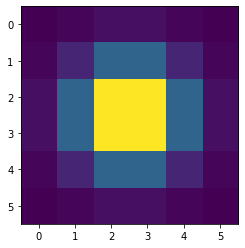

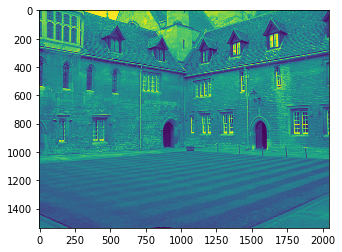

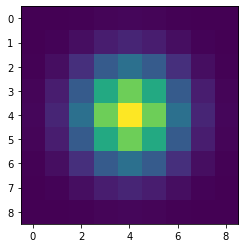

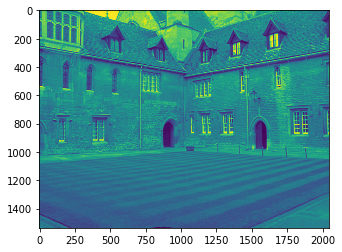

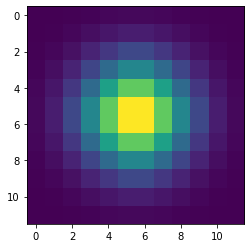

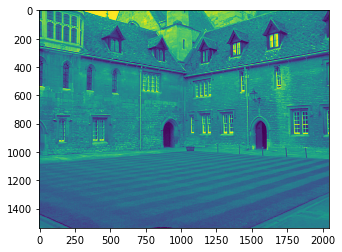

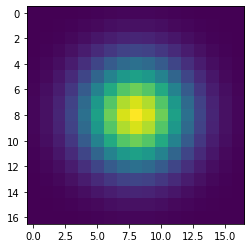

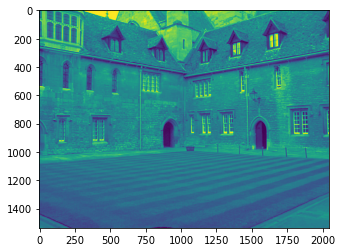

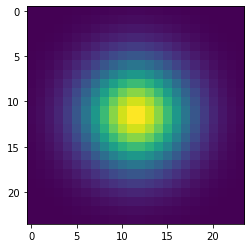

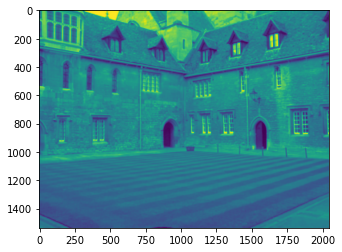

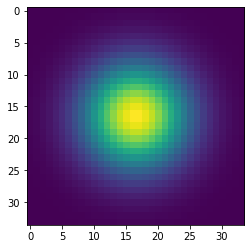

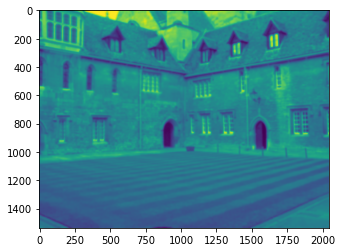

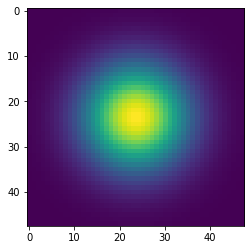

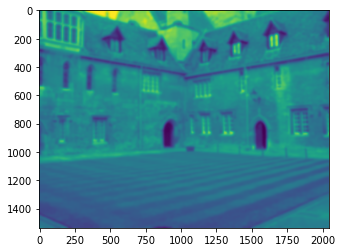

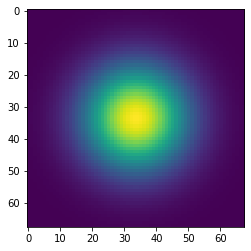

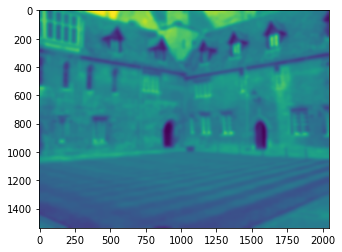

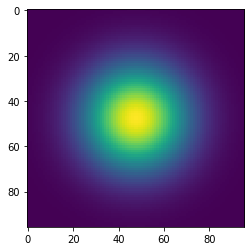

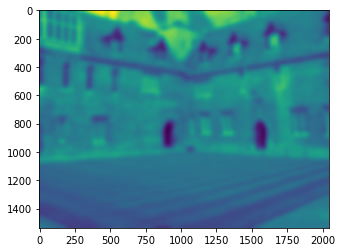

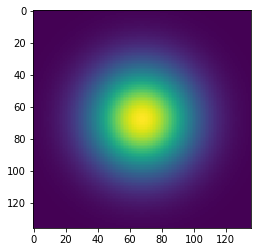

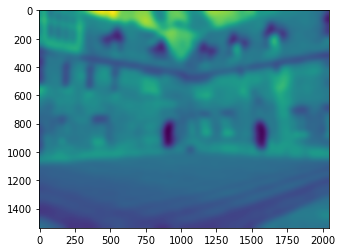

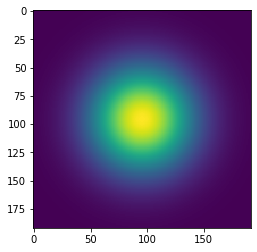

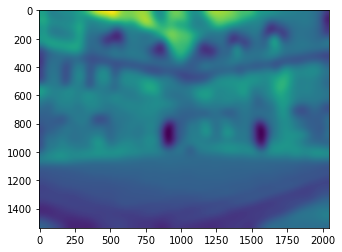

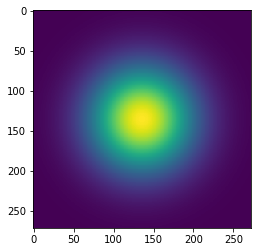

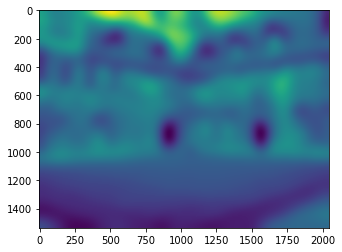

In [51]:
gaussian_img = []
for k in range(12):
    sigma = 2 ** (k/2)
    kernel_size = int(math.ceil(6 * sigma))  
    kernel_1D = cv2.getGaussianKernel(kernel_size, sigma)
    
    gaussian_kernel = kernel_1D @ kernel_1D.transpose()
    
    plt.figure()
    plt.imshow(gaussian_kernel);
    gaussian_img.append(cv2.filter2D(img_resized, -1, gaussian_kernel))
    plt.figure()
    plt.imshow(gaussian_img[k])
    


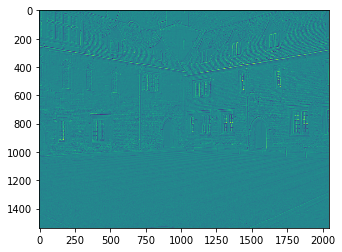

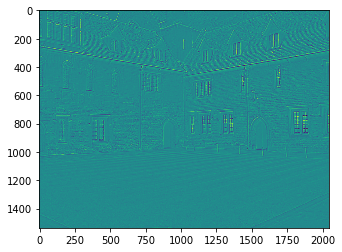

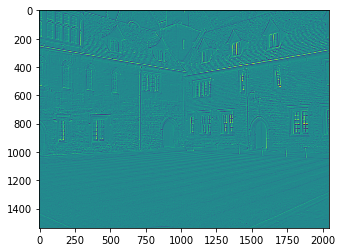

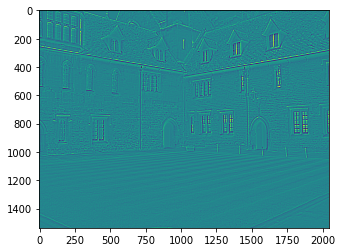

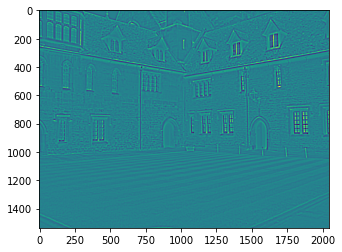

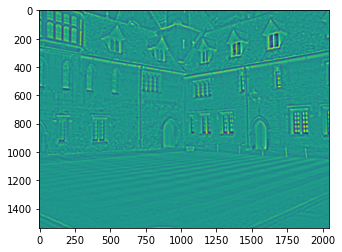

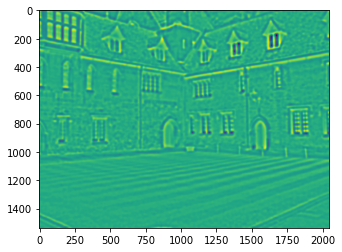

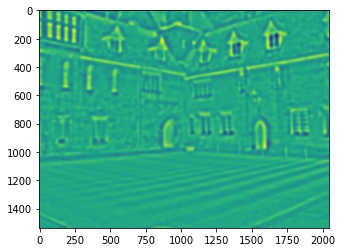

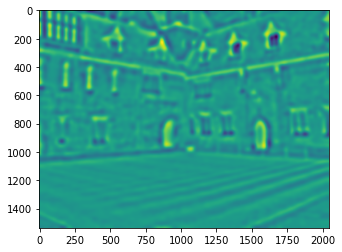

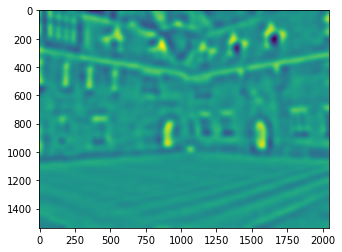

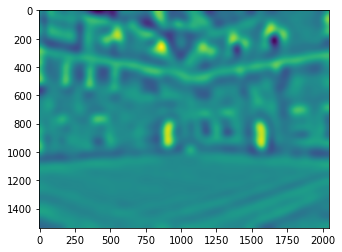

In [123]:
DOGs = [gaussian_img[i+1] - gaussian_img[i] for i in range(len(gaussian_img)-1)]
for DOG in DOGs:
    plt.figure()
    plt.imshow(DOG)
# print(gaussian_img[1])
# print(gaussian_img[0])
# print(DOGs[0], len(DOGs[0]))
# print(DOGs[0][0], len(DOGs[0][0]))

In [124]:
# for DOG in DOGs:
#     ret,thresh = cv2.threshold(DOG,10,255,cv2.THRESH_BINARY)
#     #thresh_gaussian = cv2.adaptiveThreshold(DOG,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,10,2)
#     plt.figure()
#     plt.imshow(thresh)

def non_maximum_suppression(DOGs,T):
    points = []
    for x in range(1, len(DOGs)-1):
        for y in range(1,len(DOGs[x])-1):
            for z in range(1,len(DOGs[x][y])-1):
                if ((DOGs[x][y][z]>T) and
                    (DOGs[x][y][z]>DOGs[x][y-1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x][y-1][z]) and
                    (DOGs[x][y][z]>DOGs[x][y-1][z+1]) and
                    (DOGs[x][y][z]>DOGs[x][y][z-1]) and
                    (DOGs[x][y][z]>DOGs[x][y][z+1]) and
                    (DOGs[x][y][z]>DOGs[x][y+1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x][y+1][z]) and
                    (DOGs[x][y][z]>DOGs[x][y+1][z+1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y-1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y-1][z]) and
                    (DOGs[x][y][z]>DOGs[x-1][y-1][z+1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y][z-1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y][z]) and
                    (DOGs[x][y][z]>DOGs[x-1][y][z+1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y+1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x-1][y+1][z]) and
                    (DOGs[x][y][z]>DOGs[x-1][y+1][z+1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y-1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y-1][z]) and
                    (DOGs[x][y][z]>DOGs[x+1][y-1][z+1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y][z-1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y][z]) and
                    (DOGs[x][y][z]>DOGs[x+1][y][z+1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y+1][z-1]) and
                    (DOGs[x][y][z]>DOGs[x+1][y+1][z]) and
                    (DOGs[x][y][z]>DOGs[x+1][y+1][z+1])):
                    points.append((y,z,x))
    return points



T = 10
points = non_maximum_suppression(DOGs,T)
# print(points)
print(len(points))

4449


[[ 1  0 -1]] [[ 1]
 [ 0]
 [-1]]
1536


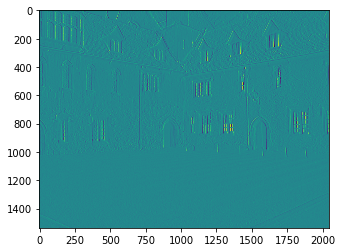

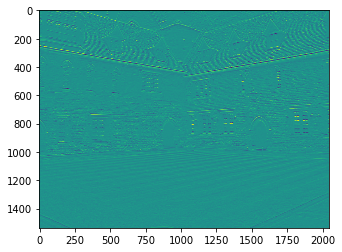

In [115]:
dx = np.array([[1,0,-1]])
dy = np.array([[1,0,-1]])
dy = dy.T
print(dx,dy)

img_x = []
img_y = []
for img in gaussian_img:
    img_x.append(cv2.filter2D(img, -1, dx))
    img_y.append(cv2.filter2D(img, -1, dy))
plt.figure()
plt.imshow(img_x[0])
plt.figure()
plt.imshow(img_y[0])

print(len(img_x[0]))
        

In [117]:
bin_width = 10
orientation = []
for point in points:
    x = []
    y = []
    for k in range(-3, 4, 1):
        x.append(math.ceil(abs(point[0] + ((3 / 2) * k * point[2]))))
        y.append(math.ceil(abs(point[1] + ((3 / 2) * k * point[2]))))
    q, r = np.meshgrid(x, y)
    hist = np.zeros(36, dtype=np.float32)

    for i in range(len(q)):
        for j in range(len(q[1])):
            sigma_dx = img_x[point[2]]
            sigma_dy = img_y[point[2]]
            if (q[i][j] >= len(sigma_dx)) or (r[i][j] >= len(sigma_dx[i])):
                continue
            else:
                Gx = sigma_dx[q[i][j]][r[i][j]]
                Gy = sigma_dy[q[i][j]][r[i][j]]
                m_qr = np.sqrt(Gx ** 2 + Gy ** 2)
                theta_qr = (np.arctan2(Gy, Gx)) * 180 / np.pi
                w_qr = np.exp(-(q[i][j] ** 2 + r[i][j] ** 2) / ((9 * (point[2] ** 2)) / 2)) / ((9 * np.pi * (point[2] ** 2)) / 2)
                weight = m_qr*w_qr
                bin_no = int(np.floor(theta_qr / bin_width))
                hist[bin_no - 1] += weight
    orientation.append(np.argmax(hist + 1) * 10)

print(orientation, len(orientation))



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [134]:
bin_width = 10
orientation = []

for point in points[0:10]:

    x = []
    y = []
    for k in range(-3,4,1):
        x.append((point[0] + ((3/2) * k * point[2])))
        y.append((point[1] + ((3/2) * k * point[2])))
    q,r = np.meshgrid(x,y)
    hist = np.zeros(36, dtype=np.float32)
   
    
    for i in range(len(q)):
        for j in range(len(q[1])):
            
            sigma_dx = img_x[point[2]]
            sigma_dy = img_y[point[2]]
            pt1 = abs(int(q[i][j]))
            pt2 = abs(int(r[i][j]))
            if (pt1 >= len(sigma_dx)) or (pt2 >= len(sigma_dx[i])):
                continue
            else:
                Gx = sigma_dx[pt1,pt2]
                Gy = sigma_dy[pt1,pt2]
                m_qr = np.sqrt(Gx**2 + Gy**2)
                theta_qr = (np.arctan2(Gy,Gx)+np.pi) * 180/np.pi 
                w_qr = np.exp(-(q[i][j]**2 + r[i][j]**2)/((9 * (point[2]**2))/2))/((9 * np.pi * (point[2]**2))/2)
                weight = m_qr*w_qr
                bin_no = int((theta_qr/bin_width))
                hist[bin_no-1] += weight
    orientation.append(np.argmax(hist+1) * 10)
# print(orientation, len(orientation))



In [126]:
for point in points:
    cv2.circle(input_image, (int(point[1]/2),int(point[0]/2)), int(3*point[2]/2), (255,0,0), 1)

cv2.imshow("result", input_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
for i, point in enumerate(points):
    print(point)
    color = (randint(0,256), randint(0,256), randint(0,256))
    center = (point[0],point[1])
    size = 3 * point[2]
    cv2.circle(img_resized, center, size, color, 1, cv2.LINE_AA)
    
    angle = (orientation[i]) * np.pi/180
    orient = (int(round(np.cos(angle)*size)), int(round(np.sin(angle)*size)))
    cv2.line(img_resized, center, (center[0]+orient[0], center[1]+orient[1]), color, 1, cv2.LINE_AA)
    
cv2.imshow("result", img_resized/255)

cv2.waitKey(0)
cv2.destroyAllWindows()

(1, 569, 1)
(4, 236, 1)
(4, 1025, 1)
(4, 2038, 1)
(5, 568, 1)
(6, 1690, 1)
(7, 248, 1)
(7, 1536, 1)
(7, 1687, 1)
(10, 59, 1)
(10, 1534, 1)
(10, 1680, 1)
(10, 1776, 1)
(11, 127, 1)
(11, 261, 1)
(11, 480, 1)
(11, 788, 1)
(11, 1025, 1)
(11, 1793, 1)
(12, 566, 1)
(12, 2034, 1)
(14, 274, 1)
(14, 1662, 1)
(15, 120, 1)
(15, 143, 1)
(15, 276, 1)
(15, 328, 1)
(15, 334, 1)
(15, 1418, 1)
(15, 1660, 1)
(15, 1748, 1)
(16, 1658, 1)
(18, 286, 1)
(18, 341, 1)
(18, 564, 1)
(19, 291, 1)
(19, 346, 1)
(19, 1644, 1)
(19, 2031, 1)
(20, 1796, 1)
(21, 319, 1)
(23, 299, 1)
(23, 359, 1)
(23, 2029, 1)
(24, 474, 1)
(24, 561, 1)
(24, 1629, 1)
(25, 318, 1)
(26, 118, 1)
(26, 367, 1)
(26, 2027, 1)
(27, 184, 1)
(27, 371, 1)
(27, 1483, 1)
(28, 560, 1)
(28, 1673, 1)
(30, 197, 1)
(30, 382, 1)
(30, 559, 1)
(30, 1610, 1)
(31, 177, 1)
(31, 386, 1)
(31, 800, 1)
(31, 1637, 1)
(33, 59, 1)
(33, 393, 1)
(33, 2024, 1)
(34, 358, 1)
(34, 363, 1)
(34, 395, 1)
(35, 118, 1)
(35, 399, 1)
(35, 1600, 1)
(35, 1625, 1)
(35, 1982, 1)
(36, 4

(391, 845, 1)
(391, 1072, 1)
(391, 1145, 1)
(391, 1478, 1)
(391, 1484, 1)
(392, 699, 1)
(392, 1110, 1)
(393, 1177, 1)
(393, 1265, 1)
(394, 1013, 1)
(394, 1468, 1)
(394, 1668, 1)
(395, 159, 1)
(395, 1167, 1)
(395, 1246, 1)
(395, 1251, 1)
(395, 1453, 1)
(395, 1490, 1)
(395, 1662, 1)
(396, 1043, 1)
(396, 1297, 1)
(397, 172, 1)
(397, 1446, 1)
(398, 1437, 1)
(399, 772, 1)
(399, 1101, 1)
(399, 1190, 1)
(399, 1282, 1)
(399, 1431, 1)
(400, 204, 1)
(400, 970, 1)
(400, 1359, 1)
(400, 1425, 1)
(401, 353, 1)
(401, 1459, 1)
(403, 729, 1)
(403, 759, 1)
(403, 1258, 1)
(403, 1345, 1)
(403, 1406, 1)
(403, 1412, 1)
(404, 1248, 1)
(405, 1157, 1)
(405, 1399, 1)
(406, 171, 1)
(406, 1488, 1)
(407, 345, 1)
(407, 758, 1)
(407, 1227, 1)
(407, 1235, 1)
(407, 1385, 1)
(408, 544, 1)
(408, 1459, 1)
(408, 1669, 1)
(409, 1182, 1)
(410, 834, 1)
(410, 1372, 1)
(411, 550, 1)
(411, 724, 1)
(411, 844, 1)
(411, 1025, 1)
(411, 1363, 1)
(411, 1397, 1)
(411, 1459, 1)
(411, 1731, 1)
(412, 12, 1)
(413, 1354, 1)
(414, 1348, 1)


(887, 1371, 1)
(887, 1480, 1)
(888, 181, 1)
(888, 405, 1)
(888, 1319, 1)
(888, 1352, 1)
(888, 1366, 1)
(889, 159, 1)
(889, 1344, 1)
(891, 1046, 1)
(895, 233, 1)
(895, 1480, 1)
(895, 1803, 1)
(895, 1818, 1)
(895, 1857, 1)
(897, 183, 1)
(897, 462, 1)
(898, 2013, 1)
(898, 2024, 1)
(898, 2029, 1)
(898, 2041, 1)
(899, 416, 1)
(900, 643, 1)
(902, 829, 1)
(903, 569, 1)
(905, 182, 1)
(905, 462, 1)
(905, 878, 1)
(906, 417, 1)
(906, 1480, 1)
(911, 647, 1)
(911, 656, 1)
(912, 1002, 1)
(913, 1481, 1)
(914, 461, 1)
(915, 106, 1)
(915, 182, 1)
(915, 441, 1)
(915, 560, 1)
(915, 813, 1)
(916, 415, 1)
(917, 393, 1)
(917, 722, 1)
(918, 879, 1)
(919, 671, 1)
(919, 800, 1)
(920, 461, 1)
(920, 824, 1)
(920, 871, 1)
(923, 182, 1)
(923, 413, 1)
(923, 433, 1)
(923, 449, 1)
(923, 1481, 1)
(924, 389, 1)
(924, 402, 1)
(924, 573, 1)
(925, 384, 1)
(928, 167, 1)
(928, 173, 1)
(929, 146, 1)
(930, 775, 1)
(931, 97, 1)
(931, 696, 1)
(931, 795, 1)
(931, 835, 1)
(932, 653, 1)
(932, 816, 1)
(933, 1395, 1)
(935, 649, 1)
(

(568, 836, 2)
(569, 709, 2)
(569, 1133, 2)
(569, 1163, 2)
(570, 1175, 2)
(570, 1194, 2)
(571, 788, 2)
(572, 1426, 2)
(574, 1144, 2)
(575, 819, 2)
(575, 1103, 2)
(575, 1194, 2)
(575, 1521, 2)
(576, 1509, 2)
(577, 1133, 2)
(577, 1417, 2)
(578, 708, 2)
(578, 1115, 2)
(578, 1163, 2)
(580, 527, 2)
(580, 1667, 2)
(581, 544, 2)
(584, 1194, 2)
(584, 1475, 2)
(585, 1535, 2)
(586, 1103, 2)
(586, 1526, 2)
(586, 1540, 2)
(587, 708, 2)
(587, 1512, 2)
(587, 1565, 2)
(588, 1163, 2)
(589, 1133, 2)
(591, 1104, 2)
(591, 1206, 2)
(593, 1184, 2)
(593, 1473, 2)
(594, 1175, 2)
(596, 305, 2)
(596, 708, 2)
(596, 1133, 2)
(596, 1163, 2)
(596, 1454, 2)
(596, 1671, 2)
(598, 1145, 2)
(599, 1103, 2)
(600, 1523, 2)
(600, 1653, 2)
(601, 1115, 2)
(601, 1194, 2)
(601, 1747, 2)
(604, 1163, 2)
(605, 1104, 2)
(607, 1133, 2)
(609, 708, 2)
(612, 1523, 2)
(612, 1657, 2)
(615, 1462, 2)
(616, 708, 2)
(616, 1592, 2)
(618, 1089, 2)
(619, 120, 2)
(620, 1445, 2)
(620, 1742, 2)
(620, 1942, 2)
(621, 1738, 2)
(621, 1752, 2)
(622, 31

(102, 232, 3)
(102, 294, 3)
(102, 1059, 3)
(102, 1378, 3)
(102, 1620, 3)
(103, 126, 3)
(103, 135, 3)
(104, 140, 3)
(104, 946, 3)
(104, 1007, 3)
(105, 143, 3)
(105, 319, 3)
(105, 1849, 3)
(106, 145, 3)
(107, 938, 3)
(107, 1016, 3)
(108, 1368, 3)
(108, 1617, 3)
(109, 294, 3)
(109, 1023, 3)
(110, 703, 3)
(110, 929, 3)
(110, 1616, 3)
(111, 552, 3)
(112, 1344, 3)
(113, 920, 3)
(114, 294, 3)
(114, 1039, 3)
(115, 120, 3)
(116, 185, 3)
(116, 914, 3)
(117, 182, 3)
(117, 193, 3)
(118, 180, 3)
(118, 909, 3)
(118, 1052, 3)
(119, 1055, 3)
(120, 1321, 3)
(121, 319, 3)
(121, 902, 3)
(122, 60, 3)
(124, 1070, 3)
(124, 1610, 3)
(125, 294, 3)
(126, 663, 3)
(126, 1075, 3)
(127, 724, 3)
(128, 318, 3)
(128, 1537, 3)
(129, 61, 3)
(129, 177, 3)
(129, 482, 3)
(130, 236, 3)
(130, 246, 3)
(130, 1285, 3)
(131, 120, 3)
(131, 741, 3)
(131, 1606, 3)
(132, 859, 3)
(135, 1273, 3)
(135, 1604, 3)
(135, 2003, 3)
(136, 757, 3)
(137, 763, 3)
(137, 1603, 3)
(139, 772, 3)
(140, 774, 3)
(141, 61, 3)
(141, 1387, 3)
(142, 231, 